In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
train = pd.read_csv('/kaggle/input/bigmartsales/train_v9rqX0R.csv')
test = pd.read_csv('/kaggle/input/bigmartsales/test_AbJTz2l.csv')
submission = pd.read_csv('/kaggle/input/bigmartsales/sample_submission_8RXa3c6.csv')

In [4]:
print(f"Train Dataset - Number of rows: {train.shape[0]}; Number of columns: {train.shape[1]}")
print(f"Test Dataset - Number of rows: {test.shape[0]}; Number of columns: {test.shape[1]}")

Train Dataset - Number of rows: 8523; Number of columns: 12
Test Dataset - Number of rows: 5681; Number of columns: 11


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.head(20)

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

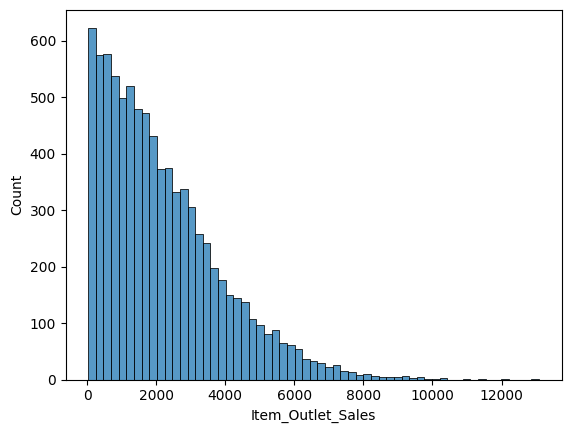

In [7]:
sns.histplot(train['Item_Outlet_Sales'])

In [8]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Missing value Imputation

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Item_Visibility', ylabel='Count'>

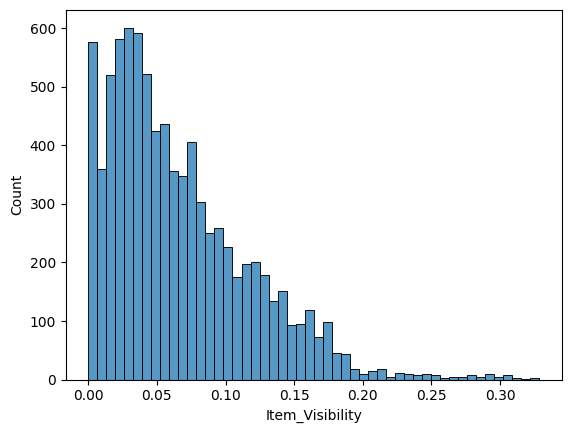

In [9]:
sns.histplot(train['Item_Visibility'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

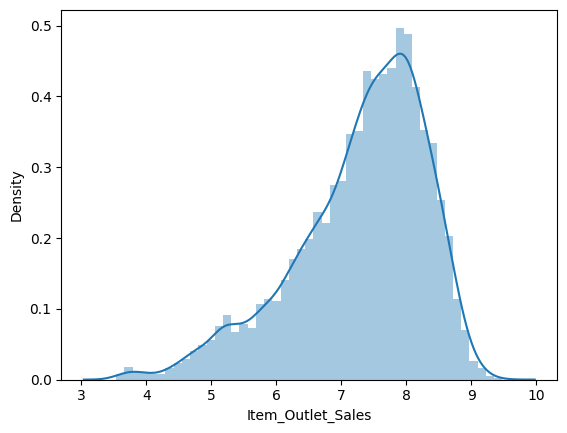

In [32]:
sns.distplot(np.log1p(train['Item_Outlet_Sales']))

In [10]:
def impute_zero_fn(data, impute_column, key_column, value_dict):
    is_zero = data[impute_column] == 0
    new_values = data[key_column].map(value_dict)
    data[impute_column] = data[impute_column].mask(is_zero, new_values)

In [11]:
#Imputing all the zero entries with average of available visibility values for the same item
train_visibility_dict = train.groupby('Item_Identifier')['Item_Visibility'].mean().to_dict()
test_visibility_dict = test.groupby('Item_Identifier')['Item_Visibility'].mean().to_dict()
# is_zero = train['Item_Visibility'] == 0
# new_values = train['Item_Identifier'].map(item_visibility_dict)
# train['Item_Visibility'] = train['Item_Visibility'].mask(is_zero, new_values)

In [12]:
impute_zero_fn(train, 'Item_Visibility', 'Item_Identifier', train_visibility_dict)
impute_zero_fn(test, 'Item_Visibility', 'Item_Identifier', test_visibility_dict)

In [13]:
#train[train['Item_Weight'].isnull()]

In [14]:
def impute_null_fn(data, impute_column, key_column, value_dict):
    is_zero = data[impute_column].isnull()
    new_values = data[key_column].map(value_dict)
    data[impute_column] = data[impute_column].mask(is_zero, new_values)

In [15]:
def weight_dict(data):
    item_weight_dictionary = data[data['Item_Weight'].notna()][['Item_Identifier', 'Item_Weight']].to_dict('records')
    item_weight_dict = {record['Item_Identifier']:record['Item_Weight'] for record in item_weight_dictionary}
    return item_weight_dict

In [16]:
# Weight is missing for many records whereas the same item has the weight value in another record hence creating 
# a dictionary and replacing NaN with appropriate value

train_weight_dict = weight_dict(train)
test_weight_dict = weight_dict(test)

impute_null_fn(train, 'Item_Weight', 'Item_Identifier', train_weight_dict)
impute_null_fn(test, 'Item_Weight', 'Item_Identifier', test_weight_dict)

In [17]:
train[train['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT045    929
OUT017    926
OUT010    555
Name: count, dtype: int64

In [18]:
train.groupby('Outlet_Identifier')['Item_Identifier'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Item_Identifier, dtype: int64

In [19]:
train[train['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [20]:
train.loc[train['Outlet_Type'].isin(['Supermarket Type1'])]['Outlet_Size'].value_counts()

Outlet_Size
Small     1860
High       932
Medium     930
Name: count, dtype: int64

In [21]:
A = train.loc[train['Outlet_Location_Type'].isin(['Tier 2'])]
A.loc[A['Outlet_Type'].isin(['Supermarket Type1'])]['Outlet_Size'].value_counts()

Outlet_Size
Small    930
Name: count, dtype: int64

In [22]:
train.loc[train['Outlet_Type'].isin(['Grocery Store'])]['Outlet_Size'].value_counts()

## Since Grocery store is generally small and because it is in Tier 3 city hence replacing the NaN for OUT010 with Small 
## and based on other analysis combining Outlet Location Typem Outlet Type, we can replace other two outlets as Medium

Outlet_Size
Small    528
Name: count, dtype: int64

In [23]:
# Checking if test data also has the same outlets with size as NaN
test[test['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT045    619
OUT017    617
OUT010    370
Name: count, dtype: int64

In [24]:
nan_outlets_dict = {'OUT045': 'Medium', 'OUT017': 'Medium', 'OUT010': 'Small'}
impute_null_fn(train, 'Outlet_Size', 'Outlet_Identifier', nan_outlets_dict)
impute_null_fn(test, 'Outlet_Size', 'Outlet_Identifier', nan_outlets_dict)

There are just three outlet for which the outlet size is missing and it contributes to almost 30% of total data

### Feature Engineering (Transformations & Synthesis)

In [25]:
train['MRP_Per_Gram']= train['Item_MRP'] / train['Item_Weight']
train['Log_Item_Visibility'] = train['Item_Visibility'].apply(np.log1p)
train['Outlet_Age'] = 2025 - train['Outlet_Establishment_Year']

In [26]:
test['MRP_Per_Gram']= test['Item_MRP'] / test['Item_Weight']
test['Log_Item_Visibility'] = test['Item_Visibility'].apply(np.log1p)
test['Outlet_Age'] = 2025 - test['Outlet_Establishment_Year']

In [27]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP_Per_Gram,Log_Item_Visibility,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,0.015920,26
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,0.019095,16
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,0.016621,26
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,9.484115,0.015158,27
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,0.008050,38
5,FDP36,10.395,Regular,0.060928,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4.944762,0.059144,16
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,4.224088,0.012661,38
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,5.671695,0.119976,40
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,5.985963,0.016549,23
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,9.782365,0.090252,18


### Correlation Analysis

I have taken only the numerical columns for calculating the correlation using the pearson method which is highly suitable for continuous data as it takes into account the magnitude of the difference between values i.e. an increase in age from 20 to 21 is same as increase from 60 to 61.Correlation of categorical columns(ordinal) using spearman correlation method.

<Axes: >

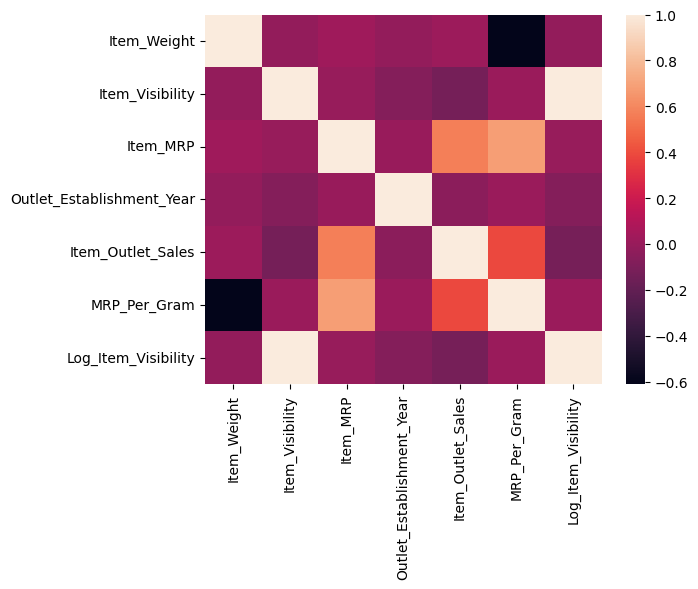

In [28]:
cols = [i for i in train.columns if train[i].dtype == 'int64' or train[i].dtype == 'float64']
corr_num = train[cols].corr()
sns.heatmap(corr_num)

In [29]:
def encode(data):
    cat_cols = []
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = le.fit_transform(data[col].astype(str))
            cat_cols.append(col)
    return data , cat_cols

<Axes: >

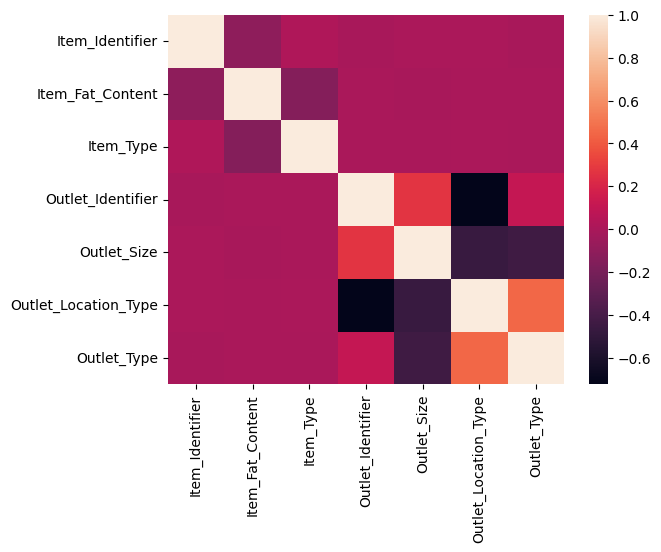

In [30]:
train_data, cat_cols = encode(train)
corr_obj = train_data[cat_cols].corr(method='spearman')
sns.heatmap(corr_obj)

In [28]:
cat_cols = [col for col in train.columns if train[col].dtype == 'object']
train[cat_cols] = train[cat_cols].astype('category')
test[cat_cols] = test[cat_cols].astype('category')

In [31]:
train.to_csv('train_modified.csv')
test.to_csv('test_modified.csv')